# Introduction to Data Analysis with Python III


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

#  Web APIs

An API, or aplication programming interface, is the way programs communicate with one another. 

Web APIs are the way programs communicate with one another _over the internet_

[RESTful](https://en.wikipedia.org/wiki/Representational_state_transfer) APIs respect a series of design principles that make them simple to use.

The basic tools we are going to use are: POST and GET requests to urls we'll specify and json objects that we'll receive as response or send as payload (in a POST command, for example).

[Open Notify](http://open-notify.org/)

*Open Notify is an open source project to provide a simple programming interface for some of NASA’s awesome data. I do some of the work to take raw data and turn them into APIs related to space and spacecraft.*

Un API ejecuta un código externo, evitándonos tener que aprender a hacer algo ya hecho

Normalmente vienen en formato JSON (JavaScript Object Notation): http://api.open-notify.org/iss-now.json

In [1]:
# !pip install requests

In [2]:
import requests

# '.get' sirve para descargar / '.post()' para publicar
response = requests.get('https://elpais.com')
response

<Response [200]>

In [3]:
response.content # Muestra el HTML de la web. Describe la estructura interna de la web en formato HTML

b'<!DOCTYPE html><html lang="es"><head><title>EL PA\xc3\x8dS: el peri\xc3\xb3dico global</title><meta name="lang" content="es"/><meta name="author" content="Ediciones El Pa\xc3\xads"/><meta name="robots" content="index,follow"/><meta name="description" content="Noticias de \xc3\xbaltima hora sobre la actualidad en Espa\xc3\xb1a y el mundo: pol\xc3\xadtica, econom\xc3\xada, deportes, cultura, sociedad, tecnolog\xc3\xada, gente, opini\xc3\xb3n, viajes, moda, televisi\xc3\xb3n, los blogs y las firmas de EL PA\xc3\x8dS. Adem\xc3\xa1s especiales, v\xc3\xaddeos, fotos, audios, gr\xc3\xa1ficos, entrevistas, promociones y todos los servicios de EL PA\xc3\x8dS."/><meta http-equiv="Refresh" content="900"/><meta name="organization" content="Ediciones EL PA\xc3\x8dS S.L."/><meta property="article:publisher" content="https://www.facebook.com/elpais/"/><meta property="og:title" content="EL PA\xc3\x8dS: el peri\xc3\xb3dico global"/><meta property="og:description" content="Noticias de \xc3\xbaltima ho

This is an API that returns the current position of the ISS:

In [4]:
response = requests.get('http://api.open-notify.org/iss-now.json')
response.content

# La 'b' inicial es para indicar que es "bytes"

b'{"message": "success", "timestamp": 1604251286, "iss_position": {"latitude": "-51.3212", "longitude": "-12.3204"}}'

In [5]:
response.content['iss-position'] # No es tan simple! Hay que parsear el texto primero (leer estructuradamente)

TypeError: byte indices must be integers or slices, not str

We can convert a json-formatted string such as the one we get in the response into a Python object with the json library:

In [6]:
import json

In [7]:
mydata = json.loads(response.content)
mydata

{'message': 'success',
 'timestamp': 1604251286,
 'iss_position': {'latitude': '-51.3212', 'longitude': '-12.3204'}}

In [8]:
type(mydata)

dict

In [9]:
mydata['iss_position']['latitude']

'-51.3212'

We also can go in the other direction and generate json-formatted strings from Python objects:

In [10]:
export_data = [{'name' : 'Daniel', 'surname' : 'Mateos'}, {'name' : 'Hermenegildo', 'surname' : 'Perez'}]
json.dumps(export_data)

'[{"name": "Daniel", "surname": "Mateos"}, {"name": "Hermenegildo", "surname": "Perez"}]'

#### Exercise:
Write a function that returns the duration of the next 5 overhead passes of the ISS for a given latitude and longitude. Use http://open-notify.org/Open-Notify-API/ISS-Pass-Times/
. We are going to need to encode the parameters in the url as per the specification.

For example, for Madrid:

http://api.open-notify.org/iss-pass.json?lat=40.4&lon=-3.7

In [11]:
# Normalmente cuando te generas tu propia librería de 'utilities', meterás todos los 'import' al comienzo, para disponer de las librerías en cada módulo

def iss_pass(lat, lon):
    url = 'http://api.open-notify.org/iss-pass.json?lat=%f&lon=%f' % (lat, lon)    
    response = requests.get(url)
    data = json.loads(response.content)
    result = [ pass_['duration'] for pass_ in data['response'] ]
    return result

iss_pass(40, -25)

[486, 652, 601, 543, 600]

Although we managed to get the response, more complicated sets of parameters will be a complicated and error-prone thing to encode. Thankfully, the `requests` library can do that work for us.

In [12]:
madrid = {'lat' : 40, 'lon' : -3}

response = requests.get('http://api.open-notify.org/iss-pass.json', params=madrid)
response.content

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1604251359, \n    "latitude": 40.0, \n    "longitude": -3.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 456, \n      "risetime": 1604275451\n    }, \n    {\n      "duration": 651, \n      "risetime": 1604281124\n    }, \n    {\n      "duration": 607, \n      "risetime": 1604286971\n    }, \n    {\n      "duration": 544, \n      "risetime": 1604292869\n    }, \n    {\n      "duration": 594, \n      "risetime": 1604298715\n    }\n  ]\n}\n'

Even more complicated sets of parameters are sometimes required. When that is the case, API designers often decide to require them in json format, received via a `POST` request.

For example, take a look at the [QPX api from Google](https://developers.google.com/qpx-express/v1/trips/search). In the documentation, they define the body of the request, which we will have to provide, and of the response, which they'll provide back. -> *Ya no funciona, porque Google compró la empresa y acabó con el API*

Ojear la API de Spotify

# Web scraping

![HTML to DOM](http://www.cs.toronto.edu/~shiva/cscb07/img/dom/treeStructure.png)

![DOM TREE](http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png)



"Scrape" significa rascar, con lo cual servirá para "rascar" (extraer) datos de una página web:
- Para entender el web scraping, hay que comprender un mínimo de HTML
- Para inspeccionar en el explorador: clic dcho / Inspeccionar (o F12 en muchos casos)

In [13]:
# Ejemplo: sacar todos los titulares de 'elmundotoday.com'

In [14]:
# !pip install bs4

In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
html = requests.get('https://www.elmundotoday.com/')
soup = BeautifulSoup(html.content) # BeautifulSoup ofrece capacidades parecidas al inspeccionador de HTML
soup

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]--><!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html lang="es"> <!--<![endif]-->
<head>
<title>El Mundo Today | la actualidad del mañana</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.elmundotoday.com/xmlrpc.php" rel="pingback"/>
<link href="https://emtstatic.com/2015/07/logo-favicon.png" rel="icon" type="image/png"/><link href="https://emtstatic.com/2015/07/logo-761.png" rel="apple-touch-icon-precomposed" sizes="76x76"/><link href="https://emtstatic.com/2015/07/logo-120.png" rel="apple-touch-icon-precomposed" sizes="120x120"/><link href="https://emtstatic.com/2015/07/152.png" rel="apple-touch-icon-precomposed" sizes="152x152"/><link href="https://emtstatic.com/2015/07/logo-114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/><link href="https://emtstatic.com/2015/07/144.png" rel="apple-touc

In [17]:
section_header = soup.find('ul') # Devuelve la primera 'ul' (unordered list), que a su vez contiene subclases 'li' (list item)
section_header

<ul class="td-mobile-main-menu" id="menu-menu-mobile"><li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-first menu-item-65940" id="menu-item-65940"><a href="https://www.elmundotoday.com/login/">Iniciar sesión</a></li>
<li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65931" id="menu-item-65931"><a href="https://www.elmundotoday.com/noticias/internacional/">Internacional</a></li>
<li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65932" id="menu-item-65932"><a href="https://www.elmundotoday.com/noticias/espanya/">España</a></li>
<li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65933" id="menu-item-65933"><a href="https://www.elmundotoday.com/noticias/sociedad/">Sociedad</a></li>
<li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65934" id="menu-item-65934"><a href="https://www.elmundotoday.com/noticias/tecnologia/">Ciencia y Tecnología</a>

In [18]:
for section in section_header.find_all('li'): # 'find_all' devuelve una lista de todos los 'li'
    print(section.text) # printea el texto de cada "li"
    print(section.find('a')['href']) # 'a' es un atributo de 'li'

Iniciar sesión
https://www.elmundotoday.com/login/
Internacional
https://www.elmundotoday.com/noticias/internacional/
España
https://www.elmundotoday.com/noticias/espanya/
Sociedad
https://www.elmundotoday.com/noticias/sociedad/
Ciencia y Tecnología
https://www.elmundotoday.com/noticias/tecnologia/
Cultura
https://www.elmundotoday.com/noticias/cultura/
Gente
https://www.elmundotoday.com/noticias/gente/
Deportes
https://www.elmundotoday.com/noticias/deportes/
Vídeos
https://www.elmundotoday.com/noticias/videos/


In [20]:
results = []

for headline in soup.find_all('h3'):
    text = headline.text
    url = headline.find('a')['href']
    results.append((text, url))
    
results

[('Los gorilas de discoteca regresan al bosque y fundan sus propias comunidades',
  'https://www.elmundotoday.com/2020/10/los-gorilas-de-discoteca-regresan-al-bosque-y-fundan-sus-propias-comunidades/'),
 ('Después del hospital de Valdebebas, Ayuso construirá una Estrella de la Muerte en Alcorcón',
  'https://www.elmundotoday.com/2020/10/despues-del-hospital-de-valdebebas-ayuso-construira-una-estrella-de-la-muerte-en-alcorcon/'),
 ('Asesina a cinco personas siguiendo las indicaciones de un fotógrafo',
  'https://www.elmundotoday.com/2020/10/asesina-a-cinco-personas-siguiendo-las-indicaciones-de-un-fotografo/'),
 ('Bartomeu deja el Barça para dirigir la NASA catalana',
  'https://www.elmundotoday.com/2020/10/bartomeu-deja-el-barca-para-dirigir-la-nasa-catalana/'),
 ('El Gobierno permitirá fiestas de 150 personas siempre y cuando se le invite',
  'https://www.elmundotoday.com/2020/10/el-gobierno-permitira-fiestas-de-150-personas-siempre-y-cuando-se-le-invite/'),
 ('El Mundo Today lanza su

Con el módulo `selenium` controlas el navegador, interactuando con páginas activas. Por ejemplo, cuando una página tiene botones de "Cargar más contenido", se utilizaría este módulo para simular esos clics

# Annex: ultra easy scraping with pandas!

When the data we want is already formatted as a table, we can do it even more easily! Just use `pandas.read_html`:

In [21]:
import pandas as pd

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll')

tables[4]

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]"
...,...,...,...
364,4,19 March 2019,"An explosion in Yilong County, Sichuan, China...."
365,4,6 May 1971,"DuPont Powder Line Explosion in Louviers, Colo..."
366,2,4 May 1988,PEPCON rocket fuel chemical plant explosion in...
367,1,19 September 1980,1980 Damascus Titan missile explosion in Van B...


# Annex II: exercises

### Exercise:

Extract the date of the worst aviation disaster from: https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html

In [23]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll')

aviation = tables[1]
aviation

,Deaths,Date,Incident,Location
0,583,27 March 1977,Pan Am Flight 1736 andKLM Flight 4805,"Tenerife, Canary Islands, Spain[16]"
1,520,12 August 1985,Japan Airlines Flight 123,"Ueno, Japan[17]"
2,349,12 November 1996,Saudi Arabian Flight 763 andKazakhstan Airline...,"Charkhi Dadri, Haryana, India[18][19]"
3,346,3 March 1974,Turkish Airlines Flight 981,"Fontaine-Chaalis, France[20]"
4,301,19 August 1980,Saudia Flight 163,"Riyadh, Saudi Arabia[21]"
5,298,17 July 2014,Malaysia Airlines Flight 17,"Hrabove, Ukraine[22]"
6,275,19 February 2003,2003 Iran Ilyushin Il-76 crash,"Kerman, Iran[23]"
7,273,25 May 1979,American Airlines Flight 191,"Des Plaines, Illinois, United States[24]"
8,265,12 November 2001,American Airlines Flight 587,"Queens, New York, United States[25]"
9,264,26 April 1994,China Airlines Flight 140,"Komaki, Japan[26]"


In [24]:
aviation.sort_values(by='Deaths', ascending=False).head(1)

,Deaths,Date,Incident,Location
0,583,27 March 1977,Pan Am Flight 1736 andKLM Flight 4805,"Tenerife, Canary Islands, Spain[16]"


In [25]:
aviation.nlargest(1, 'Deaths')

,Deaths,Date,Incident,Location
0,583,27 March 1977,Pan Am Flight 1736 andKLM Flight 4805,"Tenerife, Canary Islands, Spain[16]"


### Exercise: 

Assuming the list is exhaustive, calculate how many people died in accidental explosions per decade in the XX century. Plot it.

Data: 
https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html, pd.to_datetime, matplotlib or seaborn

In [193]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll')

explosions = tables[4]
pd.set_option('display.max_rows', explosions.shape[0])

explosions

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]"
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...
6,"256–1,500+",September 1732,Military warehouse explodes and kills up to tw...
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb..."


In [194]:
explosions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Deaths    369 non-null    object
 1   Date      369 non-null    object
 2   Incident  369 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


In [73]:
pd.to_datetime(arg=explosions['Date']).sort_values()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1626-05-30 00:00:00

Since pandas represents timestamps in nanosecond resolution, the time span that can be represented using a 64-bit integer is limited to approximately 584 years: http://pandas-docs.github.io/pandas-docs-travis/user_guide/timeseries.html#timeseries-timestamp-limits

In [74]:
explosions.iloc[[0, 71, 91, 154, 195], :]

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
71,126,11 March 1597,"Dublin Gunpowder Disaster in Dublin, Ireland"
91,100,12 October 1654,Delft Explosion in the Netherlands
154,40,12 July 1646,"Gunpowder Tower Disaster, lightning struck the..."
195,22,12 September 1634,"Gunpowder factory explosion, Valletta, Malta"


In [195]:
pd.to_datetime(arg=explosions['Date'], errors='coerce').sort_values()

92    1693-02-12
6     1732-09-01
93    1749-06-21
1     1769-08-18
61    1773-11-02
13    1794-08-31
43    1806-07-18
59    1807-01-12
27    1816-07-27
3     1862-03-06
107   1862-09-17
180   1871-08-11
196   1878-05-02
150   1883-09-29
203   1889-02-18
120   1891-08-22
236   1891-09-03
20    1893-11-03
268   1894-04-07
128   1895-01-15
251   1895-05-21
197   1895-08-18
158   1895-11-08
326   1897-07-21
228   1898-02-09
47    1900-05-01
232   1901-06-21
172   1901-11-25
174   1901-11-26
173   1902-05-12
290   1902-08-20
240   1902-11-04
259   1902-11-29
204   1903-07-29
127   1905-03-20
28    1905-09-11
241   1905-09-13
312   1906-10-05
252   1907-01-09
74    1907-03-12
132   1907-10-15
48    1908-02-27
216   1908-11-20
121   1909-01-20
253   1910-05-17
30    1911-09-25
183   1912-03-18
254   1912-11-25
166   1913-03-07
217   1913-06-24
16    1914-11-26
146   1915-09-27
162   1916-01-01
301   1916-02-16
77    1916-04-02
255   1916-05-15
277   1916-08-20
35    1916-10-20
111   1917-01-

In [208]:
explosions['Date_2'] = pd.to_datetime(arg=explosions['Date'], errors='coerce').sort_values()
explosions

,Deaths,Date,Incident,Date_2
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t...",NaT
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...,1769-08-18
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,1948-11-01
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...,1862-03-06
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]",1917-12-06
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,1941-06-08
6,"256–1,500+",September 1732,Military warehouse explodes and kills up to tw...,1732-09-01
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...,1956-08-07
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...,1926-10-16
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb...",1943-06-08


In [213]:
# explosionsXXcent1 = explosionsXXcent.copy()
# explosionsXXcent1['Year'] = explosionsXXcent1['Date_2'].astype('string').str[:4].astype('int64')
# explosionsXXcent1

In [215]:
explosions.dropna(inplace=True)
explosions['Year'] = explosions['Date_2'].dt.year
explosions

,Deaths,Date,Incident,Date_2,Year
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...,1769-08-18,1769
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,1948-11-01,1948
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...,1862-03-06,1862
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]",1917-12-06,1917
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,1941-06-08,1941
6,"256–1,500+",September 1732,Military warehouse explodes and kills up to tw...,1732-09-01,1732
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...,1956-08-07,1956
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...,1926-10-16,1926
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb...",1943-06-08,1943
10,1100,27 January 2002,"Lagos Armoury Explosion, in Lagos, Nigeria; ma...",2002-01-27,2002


In [223]:
explosions['bins'] = pd.cut(explosions['Year'],
                            bins=range(1600,2021,10),
                            include_lowest=True)
explosions

,Deaths,Date,Incident,Date_2,Year,bins
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...,1769-08-18,1769,"(1760.0, 1770.0]"
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,1948-11-01,1948,"(1940.0, 1950.0]"
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...,1862-03-06,1862,"(1860.0, 1870.0]"
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]",1917-12-06,1917,"(1910.0, 1920.0]"
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,1941-06-08,1941,"(1940.0, 1950.0]"
6,"256–1,500+",September 1732,Military warehouse explodes and kills up to tw...,1732-09-01,1732,"(1730.0, 1740.0]"
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...,1956-08-07,1956,"(1950.0, 1960.0]"
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...,1926-10-16,1926,"(1920.0, 1930.0]"
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb...",1943-06-08,1943,"(1940.0, 1950.0]"
10,1100,27 January 2002,"Lagos Armoury Explosion, in Lagos, Nigeria; ma...",2002-01-27,2002,"(2000.0, 2010.0]"


In [237]:
explosionsXXcent = explosions[(explosions['Year'] >= 1900) & (explosions['Year'] < 2000)].copy()
explosionsXXcent

,Deaths,Date,Incident,Date_2,Year,bins
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,1948-11-01,1948,"(1940.0, 1950.0]"
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]",1917-12-06,1917,"(1910.0, 1920.0]"
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,1941-06-08,1941,"(1940.0, 1950.0]"
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...,1956-08-07,1956,"(1950.0, 1960.0]"
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...,1926-10-16,1926,"(1920.0, 1930.0]"
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb...",1943-06-08,1943,"(1940.0, 1950.0]"
11,1082,18 October 1998,"Jesse pipeline explosion, near Lagos, Nigeria.",1998-10-18,1998,"(1990.0, 2000.0]"
12,1007,18 November 1918,"Ammunition transporter explosion in Hamont, Be...",1918-11-18,1918,"(1910.0, 1920.0]"
14,843,9 July 1917,Propellant explosion of the British dreadnough...,1917-07-09,1917,"(1910.0, 1920.0]"
15,800,14 April 1944,"Bombay Docks Explosion in Bombay, Bombay Presi...",1944-04-14,1944,"(1940.0, 1950.0]"


In [238]:
explosionsXXcent.shape

(275, 6)

In [239]:
explosionsXXcent['bins'].unique()

[(1940.0, 1950.0], (1910.0, 1920.0], (1950.0, 1960.0], (1920.0, 1930.0], (1990.0, 2000.0], ..., (1900.0, 1910.0], (1930.0, 1940.0], (1970.0, 1980.0], (1890.0, 1900.0], (1960.0, 1970.0]]
Length: 11
Categories (11, interval[float64]): [(1890.0, 1900.0] < (1900.0, 1910.0] < (1910.0, 1920.0] < (1920.0, 1930.0] ... (1960.0, 1970.0] < (1970.0, 1980.0] < (1980.0, 1990.0] < (1990.0, 2000.0]]

In [243]:
explosionsXXcent['bins'] = pd.cut(explosionsXXcent['Year'],
                                  bins=range(1900,2001,10),
                                  include_lowest=True)
explosionsXXcent

,Deaths,Date,Incident,Date_2,Year,bins
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,1948-11-01,1948,"(1940.0, 1950.0]"
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]",1917-12-06,1917,"(1910.0, 1920.0]"
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,1941-06-08,1941,"(1940.0, 1950.0]"
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...,1956-08-07,1956,"(1950.0, 1960.0]"
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...,1926-10-16,1926,"(1920.0, 1930.0]"
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb...",1943-06-08,1943,"(1940.0, 1950.0]"
11,1082,18 October 1998,"Jesse pipeline explosion, near Lagos, Nigeria.",1998-10-18,1998,"(1990.0, 2000.0]"
12,1007,18 November 1918,"Ammunition transporter explosion in Hamont, Be...",1918-11-18,1918,"(1910.0, 1920.0]"
14,843,9 July 1917,Propellant explosion of the British dreadnough...,1917-07-09,1917,"(1910.0, 1920.0]"
15,800,14 April 1944,"Bombay Docks Explosion in Bombay, Bombay Presi...",1944-04-14,1944,"(1940.0, 1950.0]"


In [247]:
explosions_group = explosionsXXcent.groupby(['bins']).count()
explosions_group

,Deaths,Date,Incident,Date_2,Year
bins,,,,,
"(1899.999, 1910.0]",20,20,20,20,20
"(1910.0, 1920.0]",27,27,27,27,27
"(1920.0, 1930.0]",28,28,28,28,28
"(1930.0, 1940.0]",16,16,16,16,16
"(1940.0, 1950.0]",45,45,45,45,45
"(1950.0, 1960.0]",27,27,27,27,27
"(1960.0, 1970.0]",19,19,19,19,19
"(1970.0, 1980.0]",32,32,32,32,32
"(1980.0, 1990.0]",33,33,33,33,33


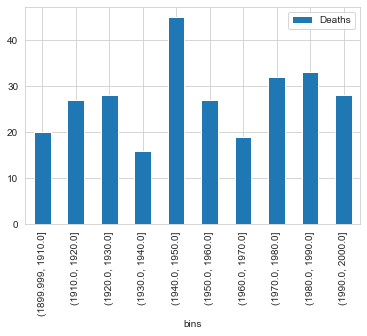

In [249]:
explosions_group.plot(y='Deaths', kind='bar');

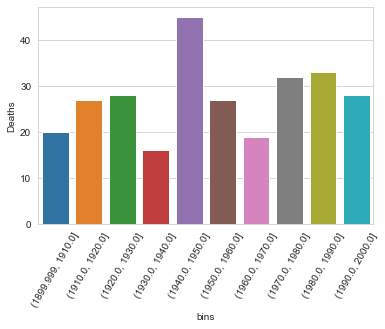

In [250]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.barplot(x=explosions_group.index, y=explosions_group["Deaths"], data=explosions_group)
for item in ax.get_xticklabels():
    item.set_rotation(60)

### Exercise: 

create a function that, given the two tables extracted from http://en.wikipedia.org/wiki/List_of_S%26P_500_companies and a date, returns the list of companies in the S&P 500 at that date.

Mi planteamiento del ejercicio:

1. Utilizando como fuente primaria la primera tabla, se pueden ordenar por fechas de entrada según "Date first added", y recopilar todas aquellas que caigan en una fecha anterior a la seleccionada.

2. Por otro lado, como aparte de haber ingresado en algún momento (primera tabla), han podido salirse de la lista, hay que contrastar con las fechas que aparecen en la segunda tabla ("Removed Ticker" - "Date").

3. De esta forma, si la fecha de salida del stock (en caso de existir) fuera posterior a la fecha seleccionada, se contaría igualmente; mientras que si la fecha de salida fuera anterior a la fecha seleccionada, se eliminaría de la lista final aplicable para la fecha elegida.

Plantear de nuevo el ejercicio, sabiendo ahora que "Date first added" hace referencia a la **ÚLTIMA** fecha en que se incorporó el stock a la lista:

Sería la suma de los registros de las dos tablas tal que:
1. De la primera tabla, todos aquellos stocks cuya fecha de última inclusión (*"Date first added"*) fuera anterior a la seleccionada por el usuario.
2. De la segunda tabla, todos aquellos stocks cuya fecha de entrada fuera anterior a la seleccionada por el usuario, y fecha de salida (de existir), fuera posterior a la seleccionada por el usuario.

In [268]:
import pandas as pd

SP500_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Selected_changes_to_the_list_of_S&P_500_components')

stocks = SP500_tables[0]
changes = SP500_tables[1]

pd.set_option('display.max_rows', stocks.shape[0] + changes.shape[0])

In [269]:
stocks.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981


In [270]:
changes.head(10)

Date  Added                               Removed  \
                 Date Ticker                      Security  Ticker   
0    October 12, 2020    NaN                           NaN     NBL   
1     October 9, 2020    VNT                       Vontier     NaN   
2     October 7, 2020   POOL              Pool Corporation    ETFC   
3  September 21, 2020   ETSY                          Etsy     HRB   
4  September 21, 2020    TER                      Teradyne    COTY   
5  September 21, 2020   CTLT                      Catalent     KSS   
6       June 22, 2020    BIO          Bio-Rad Laboratories     ADS   
7       June 22, 2020    TDY         Teledyne Technologies     HOG   
8       June 22, 2020    TYL            Tyler Technologies     JWN   
9        May 22, 2020    WST  West Pharmaceutical Services      HP   

                                                                    Reason  
                Security                                            Reason  
0           Noble Energy                 Chevron acquired Noble Energy.[6]  
1                    NaN  S&P 500 constituent Fortive spun off Vontier.[6]  
2      E*TRADE Financial               Morgan Stanley acquired E*TRADE.[7]  
3              H&R Block                  Market capitalization change.[8]  
4              Coty Inc.                  Market capitalization change.[8]  
5           Kohl's Corp.                  Market capitalization change.[8]  
6  Alliance Data Systems                  Market capitalization change.[9]  
7        Harley-Davidson                  Market capitalization change.[9]  
8              Nordstrom                  Market capitalization change.[9]  
9      Helmerich & Payne                 Market capitalization change.[10]

In [271]:
changes2 = changes.copy()
changes2.columns = ['Date', 'Added_Ticker', 'Added_Security', 'Removed_Ticker', 'Removed_Security', 'Reason']
changes2.head(10)

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason
0,"October 12, 2020",NaN,NaN,NBL,Noble Energy,Chevron acquired Noble Energy.[6]
1,"October 9, 2020",VNT,Vontier,NaN,NaN,S&P 500 constituent Fortive spun off Vontier.[6]
2,"October 7, 2020",POOL,Pool Corporation,ETFC,E*TRADE Financial,Morgan Stanley acquired E*TRADE.[7]
3,"September 21, 2020",ETSY,Etsy,HRB,H&R Block,Market capitalization change.[8]
4,"September 21, 2020",TER,Teradyne,COTY,Coty Inc.,Market capitalization change.[8]
5,"September 21, 2020",CTLT,Catalent,KSS,Kohl's Corp.,Market capitalization change.[8]
6,"June 22, 2020",BIO,Bio-Rad Laboratories,ADS,Alliance Data Systems,Market capitalization change.[9]
7,"June 22, 2020",TDY,Teledyne Technologies,HOG,Harley-Davidson,Market capitalization change.[9]
8,"June 22, 2020",TYL,Tyler Technologies,JWN,Nordstrom,Market capitalization change.[9]
9,"May 22, 2020",WST,West Pharmaceutical Services,HP,Helmerich & Payne,Market capitalization change.[10]


In [272]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       450 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                502 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [273]:
changes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              259 non-null    object
 1   Added_Ticker      255 non-null    object
 2   Added_Security    255 non-null    object
 3   Removed_Ticker    250 non-null    object
 4   Removed_Security  250 non-null    object
 5   Reason            258 non-null    object
dtypes: object(6)
memory usage: 12.3+ KB


In [274]:
changes2['Date'] = pd.to_datetime(changes2['Date'], errors='coerce')
changes2.head(10)

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason
0,2020-10-12,NaN,NaN,NBL,Noble Energy,Chevron acquired Noble Energy.[6]
1,2020-10-09,VNT,Vontier,NaN,NaN,S&P 500 constituent Fortive spun off Vontier.[6]
2,2020-10-07,POOL,Pool Corporation,ETFC,E*TRADE Financial,Morgan Stanley acquired E*TRADE.[7]
3,2020-09-21,ETSY,Etsy,HRB,H&R Block,Market capitalization change.[8]
4,2020-09-21,TER,Teradyne,COTY,Coty Inc.,Market capitalization change.[8]
5,2020-09-21,CTLT,Catalent,KSS,Kohl's Corp.,Market capitalization change.[8]
6,2020-06-22,BIO,Bio-Rad Laboratories,ADS,Alliance Data Systems,Market capitalization change.[9]
7,2020-06-22,TDY,Teledyne Technologies,HOG,Harley-Davidson,Market capitalization change.[9]
8,2020-06-22,TYL,Tyler Technologies,JWN,Nordstrom,Market capitalization change.[9]
9,2020-05-22,WST,West Pharmaceutical Services,HP,Helmerich & Payne,Market capitalization change.[10]


In [275]:
stocks_symbol = stocks[['Symbol', 'Date first added']]
stocks_symbol.head(10)

,Symbol,Date first added
0,MMM,1976-08-09
1,ABT,1964-03-31
2,ABBV,2012-12-31
3,ABMD,2018-05-31
4,ACN,2011-07-06
5,ATVI,2015-08-31
6,ADBE,1997-05-05
7,AMD,2017-03-20
8,AAP,2015-07-09
9,AES,1998-10-02


In [276]:
changes_symbol = changes2[['Date', 'Added_Ticker', 'Removed_Ticker']]
changes_symbol.head(10)

,Date,Added_Ticker,Removed_Ticker
0,2020-10-12,NaN,NBL
1,2020-10-09,VNT,NaN
2,2020-10-07,POOL,ETFC
3,2020-09-21,ETSY,HRB
4,2020-09-21,TER,COTY
5,2020-09-21,CTLT,KSS
6,2020-06-22,BIO,ADS
7,2020-06-22,TDY,HOG
8,2020-06-22,TYL,JWN
9,2020-05-22,WST,HP


In [277]:
joined = stocks_symbol.merge(right=changes_symbol, how='outer', left_on='Symbol', right_on='Added_Ticker')
# how='left' -> use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
joined

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
0,MMM,1976-08-09,NaT,NaN,NaN
1,ABT,1964-03-31,NaT,NaN,NaN
2,ABBV,2012-12-31,2012-12-31,ABBV,FII
3,ABMD,2018-05-31,2018-05-31,ABMD,WYN
4,ACN,2011-07-06,2011-07-05,ACN,MI
5,ATVI,2015-08-31,2015-08-28,ATVI,PLL
6,ADBE,1997-05-05,NaT,NaN,NaN
7,AMD,2017-03-20,2017-03-20,AMD,URBN
8,AAP,2015-07-09,2015-07-08,AAP,FDO
9,AES,1998-10-02,NaT,NaN,NaN


In [283]:
# 1er subgrupo: presentes ahora y que nunca han salido (no hay un "Date" asociado a ese Symbol en la segunda tabla)
# Por tanto, todos los stock cuya "Date first added" sea anterior a la fecha seleccionada, pasarán a formar parte
# de la lista buscada (es decir, la aplicable en ese momento).
# Más adelante, habrá que comprobar además, cuáles NO están en la lista actual, pero que SÍ estaban en ese momento.
sub1 = joined[joined['Date'].isna()].sort_values(by=['Date first added', 'Symbol'])
sub1

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
29,AEP,1957-03-04,NaT,NaN,NaN
71,BA,1957-03-04,NaT,NaN,NaN
76,BMY,1957-03-04,NaT,NaN,NaN
90,CAT,1957-03-04,NaT,NaN,NaN
117,CL,1957-03-04,NaT,NaN,NaN
122,COP,1957-03-04,NaT,NaN,NaN
83,CPB,1957-03-04,NaT,NaN,NaN
133,CVS,1957-03-04,NaT,NaN,NaN
101,CVX,1957-03-04,NaT,NaN,NaN
138,DE,1957-03-04,NaT,NaN,NaN


Se ve un número nada despreciable de stocks que aparecen en la primera tabla sin ninguna fecha de "Date first added" asociada... ¿Qué hacer con ellos de cara al ejercicio? ¿Incluirlos independientemente de la fecha seleccionada por el usuario, es decir, como si hubieran estado SIEMPRE presentes? ¿Descartarlos, como si no contaran en absoluto?

In [285]:
sub1.shape[0]

318

In [294]:
# 2o subgrupo: resto, es decir, stocks que han tenido movimiento de entrada(s) y/o salida(s)
sub2 = joined[~joined['Date'].isna()].sort_values(by=['Date', 'Added_Ticker'])
sub2

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
576,NaN,NaN,1999-12-07,YHOO,LDW
575,NaN,NaN,2000-07-27,JDSU,RAD
574,NaN,NaN,2000-12-05,ABK,CCK
573,NaN,NaN,2000-12-05,AYE,GRA
254,INTU,2000-12-05,2000-12-05,INTU,BS
572,NaN,NaN,2000-12-05,SBL,OI
571,NaN,NaN,2003-09-25,ESRX,QTRN
124,STZ,2005-07-01,2005-07-01,STZ,GLK
267,JNPR,2006-06-02,2006-06-02,JNPR,ABS
58,AVB,2007-01-10,2007-01-10,AVB,SBL


Se perciben ciertas inconsistencias en cuanto a las fechas. En ocasiones, la fecha de "Date first added" no coincide exactamente con la fecha de cambio de stocks "Date". Dado que esta diferencia es de pocos días, se asume que puede ser debido a defectos de forma, fuentes diferentes...

E.g.: *ALXN* : "Date first added" = 2012-05-25 / "Date" *(Added_Ticker)* = 2012-05-21

In [286]:
sub2.shape[0]

259

In [306]:
# Grupo de aquellos stocks que han ENTRADO una o más veces i.e. "Symbol" > 1 (2 veces sólo "UA")
sub2g1 = sub2.groupby(['Added_Ticker']).count().sort_values('Symbol', ascending=False)
sub2g1[sub2g1['Symbol'] > 0]

,Symbol,Date first added,Date,Removed_Ticker
Added_Ticker,,,,
UA,2,2,2,1
AAL,1,1,1,1
KSU,1,1,1,1
LKQ,1,1,1,1
LNT,1,1,1,1
LRCX,1,1,1,1
LVS,1,1,1,1
LW,1,1,1,1
LYB,1,1,1,1


Aquí se ve (y puede comprobarse en la web) que *UA* fue INCORPORADO el "May 1, 2014" (sacando a *BEAM*), para después volver a entrar el "April 8, 2016", **sin haber salido entre medias en ningún momento**. Esta última fecha coincide con la que aparece en la primera tabla bajo el campo *"Date first added"*.

In [308]:
# Grupo de aquellos stocks que han SALIDO una o más veces i.e. "Symbol" > 1
sub2g2 = sub2.groupby(['Removed_Ticker']).count().sort_values('Symbol', ascending=False)
sub2g2[sub2g2['Symbol'] > 0]

,Symbol,Date first added,Date,Added_Ticker
Removed_Ticker,,,,
AGN,2,2,2,2
JWN,1,1,1,1
NKTR,1,1,1,1
MJN,1,1,1,1
MMI,1,1,1,1
MNK,1,1,1,1
MON,1,1,1,1
MUR,1,1,1,1
MWW,1,1,1,1


Análogamente, aquí se ve (y puede comprobarse en la web) que *AGN* fue RETIRADO el "March 23, 2015" (metiéndose *AAL*), para después volver a salir el "May 12, 2020", **sin haber entrado entre medias en ningún momento**. Este stock no aparece en la primera tabla, como cabría esperar.

In [309]:
sub2

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
576,NaN,NaN,1999-12-07,YHOO,LDW
575,NaN,NaN,2000-07-27,JDSU,RAD
574,NaN,NaN,2000-12-05,ABK,CCK
573,NaN,NaN,2000-12-05,AYE,GRA
254,INTU,2000-12-05,2000-12-05,INTU,BS
572,NaN,NaN,2000-12-05,SBL,OI
571,NaN,NaN,2003-09-25,ESRX,QTRN
124,STZ,2005-07-01,2005-07-01,STZ,GLK
267,JNPR,2006-06-02,2006-06-02,JNPR,ABS
58,AVB,2007-01-10,2007-01-10,AVB,SBL


In [322]:
lista_sub2 = []
for i in range(sub2.shape[0]):
    lista_sub2.append(sub2.iloc[i,3]) # '3' equivale a la columna "Added_Ticker"
    if sub2.iloc[i,4] in lista_sub2: # '4' equivale a la columna "Removed_Ticker"
        lista_sub2.remove(sub2.iloc[i,4])
lista_sub2

['INTU',
 'STZ',
 'JNPR',
 'AVB',
 'KFT',
 'LUK',
 'ICE',
 'TSO',
 'EXPE',
 'JEC',
 'CRM',
 'FAST',
 'HRS',
 'HRL',
 'VTR',
 'PCLN',
 'SAIC',
 'V',
 'CERN',
 'KMX',
 'TYC',
 'IR',
 'FFIV',
 'NFLX',
 'EW',
 'BLK',
 'CMG',
 'MPC',
 'ACN',
 'MOS',
 'TEL',
 'XYL',
 'BWA',
 'DLTR',
 'PRGO',
 'CCI',
 'PSX',
 'KMI',
 'ALXN',
 'LRCX',
 'MNST',
 'STX',
 'LYB',
 'PNR',
 'DG',
 'GRMN',
 'DLPH',
 'ABBV',
 'PVH',
 'REGN',
 'KSU',
 'GM',
 'ZTS',
 'FOXA',
 'NLSN',
 'DAL',
 'AME',
 'VRTX',
 'KORS',
 'ALLE',
 'FB',
 'MHK',
 'TSCO',
 'ESS',
 'GOOGL',
 'UA',
 'AVGO',
 'MLM',
 'DISCK',
 'UHS',
 'URI',
 'RCL',
 'HCA',
 'SWKS',
 'HSIC',
 'AAL',
 'EQIX',
 'HBI',
 'SLG',
 'O',
 'QRVO',
 'JBHT',
 'KHC',
 'AAP',
 'PYPL',
 'ATVI',
 'UAL',
 'FOX',
 'NWS',
 'VRSK',
 'HPE',
 'SYF',
 'ILMN',
 'CHD',
 'WLTW',
 'EXR',
 'CFG',
 'FRT',
 'CXO',
 'AWK',
 'UDR',
 'CNC',
 'HOLX',
 'UA',
 'ULTA',
 'GPN',
 'ALK',
 'DLR',
 'LKQ',
 'AJG',
 'TDG',
 'FBHS',
 'ALB',
 'LNT',
 'FTV',
 'MTD',
 'CHTR',
 'COO',
 'ARNC',
 'MAA',
 'IDXX'

In [323]:
['INTU' in lista, 'BS' in lista, 'YHOO' in lista_sub2]

[True, False, False]

In [346]:
date = '2019-01-01'
date

'2019-01-01'

In [347]:
# Este primer grupo sabemos seguro que, habiéndose incorporado por última vez ANTES que la fecha seleccionada,
# estarán contenidos en la lista definitiva.
sub1d = sub1[sub1['Date first added'] < date]
sub1d

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
29,AEP,1957-03-04,NaT,NaN,NaN
71,BA,1957-03-04,NaT,NaN,NaN
76,BMY,1957-03-04,NaT,NaN,NaN
90,CAT,1957-03-04,NaT,NaN,NaN
117,CL,1957-03-04,NaT,NaN,NaN
122,COP,1957-03-04,NaT,NaN,NaN
83,CPB,1957-03-04,NaT,NaN,NaN
133,CVS,1957-03-04,NaT,NaN,NaN
101,CVX,1957-03-04,NaT,NaN,NaN
138,DE,1957-03-04,NaT,NaN,NaN


In [348]:
sub1d_list = []
for i in range(sub1d.shape[0]):
    sub1d_list.append(sub1d.iloc[i,0]) # '0' equivale a la columna "Symbol"
sub1d_list

['AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'COP',
 'CPB',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'EIX',
 'ETR',
 'EXC',
 'F',
 'GD',
 'HAL',
 'HIG',
 'HSY',
 'IBM',
 'IP',
 'KMB',
 'KO',
 'KR',
 'MO',
 'MRK',
 'NSC',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PPG',
 'SEE',
 'SO',
 'UNP',
 'XEL',
 'XOM',
 'ABT',
 'HON',
 'HWM',
 'SHW',
 'CMI',
 'EMR',
 'SLB',
 'CSX',
 'CLX',
 'GIS',
 'NEM',
 'MCD',
 'LLY',
 'BAX',
 'BDX',
 'JNJ',
 'GPC',
 'HPQ',
 'WMB',
 'JPM',
 'IFF',
 'AXP',
 'BAC',
 'CI',
 'DIS',
 'DUK',
 'LNC',
 'NEE',
 'TAP',
 'WFC',
 'MMM',
 'INTC',
 'TGT',
 'TXT',
 'VFC',
 'WBA',
 'AIG',
 'FDX',
 'PCAR',
 'ADP',
 'GWW',
 'MAS',
 'ADM',
 'WMT',
 'SNA',
 'SWK',
 'BF.B',
 'AAPL',
 'OXY',
 'CAG',
 'LB',
 'VZ',
 'T',
 'LOW',
 'PHM',
 'HES',
 'LMT',
 'HAS',
 'BLL',
 'APD',
 'NUE',
 'PKI',
 'NOC',
 'CNP',
 'TJX',
 'DOV',
 'PH',
 'ITW',
 'GPS',
 'MDT',
 'SYY',
 'MMC',
 'AVY',
 'HD',
 'PNC',
 'C',
 'NKE',
 'ECL',
 'GL',
 'NWL',
 'ORCL',
 'ADSK',
 'MRO',
 'AEE',
 'AMGN',
 'LIN',
 'IPG',
 'COST',
 'CSCO',
 'EMN

In [349]:
# Para este segundo grupo tendremos que ordenar primero por fecha en orden cronológico, y después eliminar todos
# aquellos registros (entradas/salidas stock) que hayan tenido lugar posteriormente a la fecha seleccionada.
sub2d = sub2[sub2['Date'] < date]
sub2d

,Symbol,Date first added,Date,Added_Ticker,Removed_Ticker
576,NaN,NaN,1999-12-07,YHOO,LDW
575,NaN,NaN,2000-07-27,JDSU,RAD
574,NaN,NaN,2000-12-05,ABK,CCK
573,NaN,NaN,2000-12-05,AYE,GRA
254,INTU,2000-12-05,2000-12-05,INTU,BS
572,NaN,NaN,2000-12-05,SBL,OI
571,NaN,NaN,2003-09-25,ESRX,QTRN
124,STZ,2005-07-01,2005-07-01,STZ,GLK
267,JNPR,2006-06-02,2006-06-02,JNPR,ABS
58,AVB,2007-01-10,2007-01-10,AVB,SBL


In [350]:
sub2d_list = []
for i in range(sub2d.shape[0]):
    sub2d_list.append(sub2d.iloc[i,3]) # '3' equivale a la columna "Added_Ticker"
    if sub2d.iloc[i,4] in sub2d_list: # '4' equivale a la columna "Removed_Ticker"
        sub2d_list.remove(sub2d.iloc[i,4])
sub2d_list

['INTU',
 'STZ',
 'JNPR',
 'AVB',
 'KFT',
 'LUK',
 'ICE',
 'TSO',
 'EXPE',
 'JEC',
 'CRM',
 'FAST',
 'HRS',
 'HRL',
 'VTR',
 'PCLN',
 'SAIC',
 'V',
 'HP',
 'CERN',
 'KMX',
 'TYC',
 'IR',
 'FFIV',
 'NFLX',
 'NFX',
 'EW',
 'BLK',
 'CMG',
 'MPC',
 'ACN',
 'MOS',
 'TEL',
 'XYL',
 'BWA',
 'DLTR',
 'PRGO',
 'TRIP',
 'CCI',
 'PSX',
 'KMI',
 'ALXN',
 'LRCX',
 'MNST',
 'STX',
 'LYB',
 'PNR',
 'DG',
 'GRMN',
 'DLPH',
 'ABBV',
 'PVH',
 'REGN',
 'MAC',
 'KSU',
 'GM',
 'ZTS',
 'FOXA',
 'NLSN',
 'DAL',
 'AME',
 'VRTX',
 'KORS',
 'ALLE',
 'ADS',
 'FB',
 'MHK',
 'TSCO',
 'ESS',
 'GOOGL',
 'UA',
 'AVGO',
 'XEC',
 'AMG',
 'MLM',
 'DISCK',
 'UHS',
 'URI',
 'RCL',
 'HCA',
 'SWKS',
 'HSIC',
 'AAL',
 'EQIX',
 'HBI',
 'SLG',
 'O',
 'QRVO',
 'JBHT',
 'KHC',
 'AAP',
 'PYPL',
 'ATVI',
 'UAL',
 'FOX',
 'NWS',
 'VRSK',
 'HPE',
 'SYF',
 'ILMN',
 'CHD',
 'WLTW',
 'EXR',
 'CFG',
 'FRT',
 'CXO',
 'AWK',
 'UDR',
 'CNC',
 'HOLX',
 'FL',
 'UA',
 'ULTA',
 'GPN',
 'ALK',
 'DLR',
 'LKQ',
 'AJG',
 'TDG',
 'FBHS',
 'ALB',
 '

In [351]:
d_list = sub1d_list + sub2d_list
d_list

['AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'COP',
 'CPB',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'EIX',
 'ETR',
 'EXC',
 'F',
 'GD',
 'HAL',
 'HIG',
 'HSY',
 'IBM',
 'IP',
 'KMB',
 'KO',
 'KR',
 'MO',
 'MRK',
 'NSC',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PPG',
 'SEE',
 'SO',
 'UNP',
 'XEL',
 'XOM',
 'ABT',
 'HON',
 'HWM',
 'SHW',
 'CMI',
 'EMR',
 'SLB',
 'CSX',
 'CLX',
 'GIS',
 'NEM',
 'MCD',
 'LLY',
 'BAX',
 'BDX',
 'JNJ',
 'GPC',
 'HPQ',
 'WMB',
 'JPM',
 'IFF',
 'AXP',
 'BAC',
 'CI',
 'DIS',
 'DUK',
 'LNC',
 'NEE',
 'TAP',
 'WFC',
 'MMM',
 'INTC',
 'TGT',
 'TXT',
 'VFC',
 'WBA',
 'AIG',
 'FDX',
 'PCAR',
 'ADP',
 'GWW',
 'MAS',
 'ADM',
 'WMT',
 'SNA',
 'SWK',
 'BF.B',
 'AAPL',
 'OXY',
 'CAG',
 'LB',
 'VZ',
 'T',
 'LOW',
 'PHM',
 'HES',
 'LMT',
 'HAS',
 'BLL',
 'APD',
 'NUE',
 'PKI',
 'NOC',
 'CNP',
 'TJX',
 'DOV',
 'PH',
 'ITW',
 'GPS',
 'MDT',
 'SYY',
 'MMC',
 'AVY',
 'HD',
 'PNC',
 'C',
 'NKE',
 'ECL',
 'GL',
 'NWL',
 'ORCL',
 'ADSK',
 'MRO',
 'AEE',
 'AMGN',
 'LIN',
 'IPG',
 'COST',
 'CSCO',
 'EMN

In [352]:
'ESRX' in sub1d_list, 'ESRX' in sub2d_list, 'ESRX' in d_list

(False, False, False)

### SOLUCIÓN INTEGRADA AL EJERCICIO

In [353]:
def SP500_list(date = ''):
    '''
    Function that, using the two tables extracted from Wikipedia
    (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Selected_changes_to_the_list_of_S&P_500_components),
    and a date ("date") provided by the user, returns the list of companies in the S&P 500 at that date.
    '''
    
    import pandas as pd
    
    path = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Selected_changes_to_the_list_of_S&P_500_components'
    SP500_tables = pd.read_html(path)

    stocks = SP500_tables[0]
    changes = SP500_tables[1]

    pd.set_option('display.max_rows', stocks.shape[0] + changes.shape[0])

    changes2 = changes.copy()
    changes2.columns = ['Date', 'Added_Ticker', 'Added_Security', 'Removed_Ticker', 'Removed_Security', 'Reason']
    changes2['Date'] = pd.to_datetime(changes2['Date'], errors='coerce')

    stocks_symbol = stocks[['Symbol', 'Date first added']]
    changes_symbol = changes2[['Date', 'Added_Ticker', 'Removed_Ticker']]

    joined = stocks_symbol.merge(right=changes_symbol, how='outer', left_on='Symbol', right_on='Added_Ticker')
    # how='left' -> use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically

    # 1er subgrupo: presentes ahora y que nunca han salido (no hay un "Date" asociado a ese Symbol en la segunda tabla)
    # Por tanto, todos los stock cuya "Date first added" sea anterior a la fecha seleccionada, pasarán a formar parte
    # de la lista buscada (es decir, la aplicable en ese momento).
    # Más adelante, habrá que comprobar además, cuáles NO están en la lista actual, pero que SÍ estaban en ese momento.
    sub1 = joined[joined['Date'].isna()].sort_values(by=['Date first added', 'Symbol'])
    # Este primer grupo sabemos seguro que, habiéndose incorporado por última vez ANTES que la fecha seleccionada,
    # estarán contenidos en la lista definitiva.
    sub1d = sub1[sub1['Date first added'] < date]
    sub1d_list = []
    for i in range(sub1d.shape[0]):
        sub1d_list.append(sub1d.iloc[i,0]) # '0' equivale a la columna "Symbol"

    # 2o subgrupo: resto, es decir, stocks que han tenido movimiento de entrada(s) y/o salida(s)
    sub2 = joined[~joined['Date'].isna()].sort_values(by=['Date', 'Added_Ticker'])
    # Para este segundo grupo tendremos que ordenar primero por fecha en orden cronológico, y después eliminar todos
    # aquellos registros (entradas/salidas stock) que hayan tenido lugar posteriormente a la fecha seleccionada.
    sub2d = sub2[sub2['Date'] < date]
    sub2d_list = []
    for i in range(sub2d.shape[0]):
        sub2d_list.append(sub2d.iloc[i,3]) # '3' equivale a la columna "Added_Ticker"
        if sub2d.iloc[i,4] in sub2d_list: # '4' equivale a la columna "Removed_Ticker"
            sub2d_list.remove(sub2d.iloc[i,4])

    d_list = sub1d_list + sub2d_list

    return d_list    


In [354]:
help(SP500_list)

Help on function SP500_list in module __main__:

SP500_list(date='')
    Function that, using the two tables extracted from Wikipedia
    (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Selected_changes_to_the_list_of_S&P_500_components),
    and a date ("date") provided by the user, returns the list of companies in the S&P 500 at that date.



In [362]:
T_2019_01_01 = SP500_list(date = '2019-01-01')   
T_2019_01_01

['AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'COP',
 'CPB',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'EIX',
 'ETR',
 'EXC',
 'F',
 'GD',
 'HAL',
 'HIG',
 'HSY',
 'IBM',
 'IP',
 'KMB',
 'KO',
 'KR',
 'MO',
 'MRK',
 'NSC',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PPG',
 'SEE',
 'SO',
 'UNP',
 'XEL',
 'XOM',
 'ABT',
 'HON',
 'HWM',
 'SHW',
 'CMI',
 'EMR',
 'SLB',
 'CSX',
 'CLX',
 'GIS',
 'NEM',
 'MCD',
 'LLY',
 'BAX',
 'BDX',
 'JNJ',
 'GPC',
 'HPQ',
 'WMB',
 'JPM',
 'IFF',
 'AXP',
 'BAC',
 'CI',
 'DIS',
 'DUK',
 'LNC',
 'NEE',
 'TAP',
 'WFC',
 'MMM',
 'INTC',
 'TGT',
 'TXT',
 'VFC',
 'WBA',
 'AIG',
 'FDX',
 'PCAR',
 'ADP',
 'GWW',
 'MAS',
 'ADM',
 'WMT',
 'SNA',
 'SWK',
 'BF.B',
 'AAPL',
 'OXY',
 'CAG',
 'LB',
 'VZ',
 'T',
 'LOW',
 'PHM',
 'HES',
 'LMT',
 'HAS',
 'BLL',
 'APD',
 'NUE',
 'PKI',
 'NOC',
 'CNP',
 'TJX',
 'DOV',
 'PH',
 'ITW',
 'GPS',
 'MDT',
 'SYY',
 'MMC',
 'AVY',
 'HD',
 'PNC',
 'C',
 'NKE',
 'ECL',
 'GL',
 'NWL',
 'ORCL',
 'ADSK',
 'MRO',
 'AEE',
 'AMGN',
 'LIN',
 'IPG',
 'COST',
 'CSCO',
 'EMN

In [363]:
%%time

T_2019_01_01 = SP500_list(date = '2019-01-01')   
T_2019_01_01

CPU times: user 1.73 s, sys: 22.3 ms, total: 1.76 s
Wall time: 2.63 s


['AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'COP',
 'CPB',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'EIX',
 'ETR',
 'EXC',
 'F',
 'GD',
 'HAL',
 'HIG',
 'HSY',
 'IBM',
 'IP',
 'KMB',
 'KO',
 'KR',
 'MO',
 'MRK',
 'NSC',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PPG',
 'SEE',
 'SO',
 'UNP',
 'XEL',
 'XOM',
 'ABT',
 'HON',
 'HWM',
 'SHW',
 'CMI',
 'EMR',
 'SLB',
 'CSX',
 'CLX',
 'GIS',
 'NEM',
 'MCD',
 'LLY',
 'BAX',
 'BDX',
 'JNJ',
 'GPC',
 'HPQ',
 'WMB',
 'JPM',
 'IFF',
 'AXP',
 'BAC',
 'CI',
 'DIS',
 'DUK',
 'LNC',
 'NEE',
 'TAP',
 'WFC',
 'MMM',
 'INTC',
 'TGT',
 'TXT',
 'VFC',
 'WBA',
 'AIG',
 'FDX',
 'PCAR',
 'ADP',
 'GWW',
 'MAS',
 'ADM',
 'WMT',
 'SNA',
 'SWK',
 'BF.B',
 'AAPL',
 'OXY',
 'CAG',
 'LB',
 'VZ',
 'T',
 'LOW',
 'PHM',
 'HES',
 'LMT',
 'HAS',
 'BLL',
 'APD',
 'NUE',
 'PKI',
 'NOC',
 'CNP',
 'TJX',
 'DOV',
 'PH',
 'ITW',
 'GPS',
 'MDT',
 'SYY',
 'MMC',
 'AVY',
 'HD',
 'PNC',
 'C',
 'NKE',
 'ECL',
 'GL',
 'NWL',
 'ORCL',
 'ADSK',
 'MRO',
 'AEE',
 'AMGN',
 'LIN',
 'IPG',
 'COST',
 'CSCO',
 'EMN

#### DUDAS

Se ve un número nada despreciable de stocks (**55**) que aparecen en la primera tabla sin ninguna fecha de "Date first added" asociada... ¿Qué hacer con ellos de cara al ejercicio? ¿Incluirlos independientemente de la fecha seleccionada por el usuario, es decir, como si hubieran estado SIEMPRE presentes? ¿Descartarlos, como si no contaran en absoluto?

In [357]:
stocks[stocks['Date first added'].isna()]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
123,ED,Consolidated Edison,reports,Utilities,Electric Utilities,"New York, New York",NaN,1047862,1823
127,GLW,Corning Inc.,reports,Information Technology,Electronic Components,"Corning, New York",NaN,24741,1851
135,DHR,Danaher Corp.,reports,Health Care,Health Care Equipment,"Washington, D.C.",NaN,313616,1969
136,DRI,Darden Restaurants,reports,Consumer Discretionary,Restaurants,"Orlando, Florida",NaN,940944,1938
151,D,Dominion Energy,reports,Utilities,Electric Utilities,"Richmond, Virginia",NaN,715957,1983
161,ETN,Eaton Corporation,reports,Industrials,Electrical Components & Equipment,"Dublin, Ireland",NaN,1551182,1911
162,EBAY,eBay Inc.,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"San Jose, California",NaN,1065088,1995
177,ES,Eversource Energy,reports,Utilities,Multi-Utilities,"Springfield, Massachusetts",NaN,72741,1966
190,FITB,Fifth Third Bancorp,reports,Financials,Regional Banks,"Cincinnati, Ohio",NaN,35527,1858
191,FE,FirstEnergy Corp,reports,Utilities,Electric Utilities,"Akron, Ohio",NaN,1031296,1997


In [361]:
empty_DateFirstAdded = stocks[stocks['Date first added'].isna()]['Symbol'].to_list()
len(empty_DateFirstAdded), empty_DateFirstAdded

(55,
 ['ED',
  'GLW',
  'DHR',
  'DRI',
  'D',
  'ETN',
  'EBAY',
  'ES',
  'FITB',
  'FE',
  'BEN',
  'FCX',
  'GE',
  'HUM',
  'HBAN',
  'K',
  'KLAC',
  'LHX',
  'LEG',
  'L',
  'MAR',
  'MKC',
  'MCK',
  'MET',
  'MCO',
  'MS',
  'MSI',
  'NI',
  'NTRS',
  'OMC',
  'PAYX',
  'PNW',
  'PPL',
  'QCOM',
  'RTX',
  'ROK',
  'SPGI',
  'SRE',
  'SBUX',
  'STT',
  'TROW',
  'TPR',
  'TXN',
  'TMO',
  'TSN',
  'USB',
  'VLO',
  'VIAC',
  'VNO',
  'WM',
  'WAT',
  'WRK',
  'WY',
  'WHR',
  'XRX'])

In [367]:
# Ahora mismo, no estarían incluidos ninguno de esos:
T_2020_11_07 = SP500_list(date = '2020-11-07')   

empty_DateFirstAdded in T_2020_11_07, "ED" in T_2020_11_07

(False, False)

Se perciben ciertas inconsistencias en cuanto a las fechas. En ocasiones, la fecha de "Date first added" no coincide exactamente con la fecha de cambio de stocks "Date". Dado que esta diferencia es de pocos días, se asume que puede ser debido a defectos de forma, fuentes diferentes...

E.g.: *ALXN* : "Date first added" = 2012-05-25 / "Date" *(Added_Ticker)* = 2012-05-21

¿Cómo se operaría si se tratara de un proyecto real y las fuentes no fueran homogéneas? En este caso, por ejemplo, si se seleccionara como fecha "2012-05-23", *ALXN* quedaría incluido, cuando puede que no fuera hasta el "2012-05-25" que se incluyera realmente.

In [369]:
T_2012_05_23 = SP500_list(date = '2012-05-23')   

"ALXN" in T_2012_05_23

True

Aquí se ve (y puede comprobarse en la web) que *UA* fue INCORPORADO el "May 1, 2014" (sacando a *BEAM*), para después volver a entrar el "April 8, 2016", **sin haber salido entre medias en ningún momento**. Esta última fecha coincide con la que aparece en la primera tabla bajo el campo *"Date first added"*.

In [370]:
stocks[stocks['Symbol'] == "UA"]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
456,UA,Under Armour (Class C),reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2016-04-08,1336917,1996


In [383]:
changes2[changes2['Added_Ticker'] == "UA"]

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason
98,2016-04-08,UA,Under Armour Class C,NaN,NaN,Under Armour distribution of second class of s...
156,2014-05-01,UA,Under Armour,BEAM,Beam Inc.,Beam acquired by Suntory[125]


In [384]:
changes2[changes2['Removed_Ticker'] == "UA"]

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason


Análogamente, aquí se ve (y puede comprobarse en la web) que *AGN* fue RETIRADO el "March 23, 2015" (metiéndose *AAL*), para después volver a salir el "May 12, 2020", **sin haber entrado entre medias en ningún momento**. Este stock no aparece en la primera tabla, como cabría esperar.

In [388]:
stocks[stocks['Symbol'] == "AGN"]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded


In [389]:
changes2[changes2['Added_Ticker'] == "AGN"]

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason


In [390]:
changes2[changes2['Removed_Ticker'] == "AGN"]

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason
11,2020-05-12,DXCM,Dexcom,AGN,Allergan,Allergan acquired by AbbVie.[11]
138,2015-03-23,AAL,American Airlines Group,AGN,"Allergan, Inc",Allergan acquired by Actavis plc (and changed ...
